In [185]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [186]:
bg = np.loadtxt("./../output/kgb_hiclass_background.dat")
bg_gev = np.loadtxt("./../../k-evolution_devel/output/file_background.dat")
bg_gev2 = np.loadtxt("./../../k-evolution_devel/k_evolution_test_references/CLASS_interface_Bg_cs2_em4/file_background.dat")


In [187]:
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a

def Hubble_prime_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return -(H0**2/2.)*(Omega_m*(a**-1) + 2. * Omega_rad*(a**-2) + (1.+3. * w)*Omega_kessence *(a**(-1.-3.*w)))



# Background test

## z($\tau$)

Text(0,0.5,'$\\tau$')

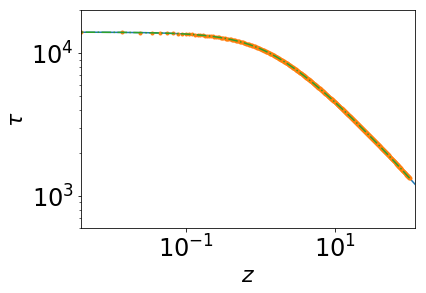

In [188]:
plt.plot(bg[:,0],bg[:,2])
plt.plot(1./bg_gev[:,2]-1,bg_gev[:,1]*400./0.67556,".")

plt.plot(1./bg_gev2[:,2]-1,bg_gev2[:,1]*400./0.67556,"-.")

plt.yscale("log")
plt.xscale("log")
plt.tick_params(labelsize=24)
plt.ylim(6*10**2,2*10**4)
plt.xlim(0,120)
plt.xlabel("$z$",fontsize=22)
plt.ylabel("$\\tau$",fontsize=22)

## $\mathcal{H}$(z)

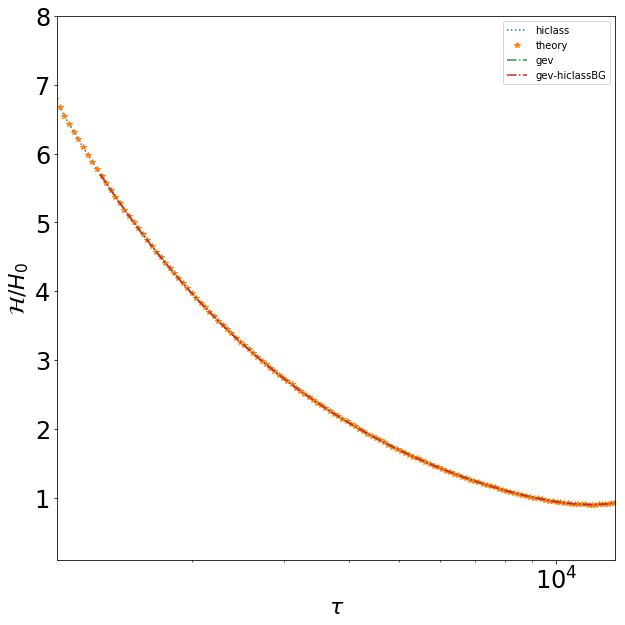

In [190]:
plt.figure(figsize=(10,10))

a = 1./(1. + bg[:,0])
plt.plot(bg[:,2],bg[:,3]*a/bg[-1:,3],":",label="hiclass")
plt.plot(bg[::5,2],Hubble_conf_Mpc(a[::5])/Hubble_conf_Mpc(1.),"*",label="theory")
plt.plot(bg_gev[:,1]*400./0.67556, bg_gev[:,3],"-.",label="gev")

plt.plot(bg_gev2[:,1]*400./0.67556, bg_gev2[:,3],"-.",label="gev-hiclassBG")

# plt.yscale("log")
plt.xscale("log")
plt.tick_params(labelsize=24)
plt.ylim(0.1,8)
plt.xlim(1100,13000)
plt.ylabel("$\mathcal{H}/H_0$",fontsize=22)
plt.xlabel("$\\tau$",fontsize=22)
plt.legend()

## Gradient of the previous Figure

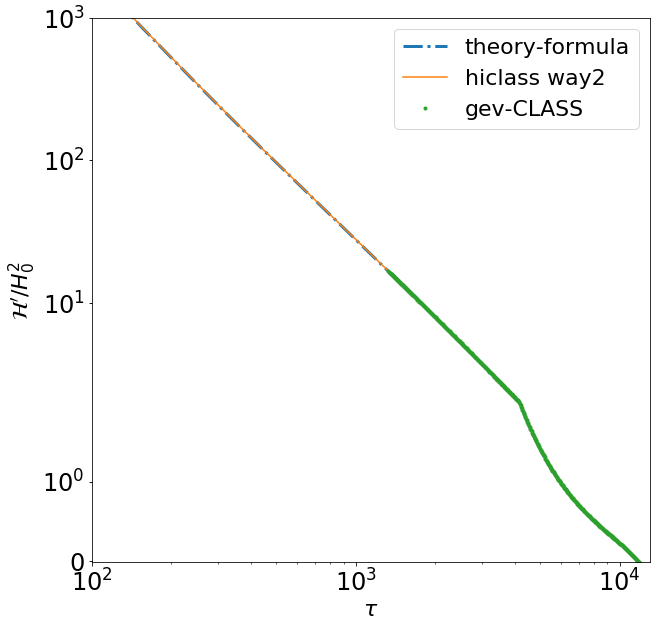

In [333]:
plt.figure(figsize=(10,10))

a = 1./(1. + bg[:,0])
### Hiclass H_conf
# plt.plot(bg[:,2],bg[:,3]*a/bg[-1:,3],":",label="hiclass")
x = bg[:,2];
y = bg[:,3]*a/bg[-1:,3];
der = np.gradient(y,x)
# plt.plot(x,-der/bg[-1:,3],"-",lw=3,label="hiclass der of H")

## Theory
# plt.plot(bg[::5,2],Hubble_conf_Mpc(a[::5])/Hubble_conf_Mpc(1.),"*",label="theory")
x = bg[:,2];
a = 1./(1. + bg[:,0])
y = Hubble_conf_Mpc(a[:])/Hubble_conf_Mpc(1.);
der = np.gradient(y,x)
# plt.plot(x,-der/bg[-1:,3],"-",label="H' theory, der of H")

### From the formula of H'(a)
plt.plot(x,-Hubble_prime_conf_Mpc(a)/Hubble_conf_Mpc(1.)/Hubble_conf_Mpc(1.),"-.",lw =3,label="theory-formula")

### gevolution internal solution
# x = bg_gev[:,1]*400./0.67556;
# y = bg_gev[:,3];
# der = np.gradient(y,x)
# plt.plot(x,-der/bg[-1:,3],":",lw =3,label="H' gev - der of H")


## gevolution hiclass interface!
x = bg_gev2[:,1]*400./0.67556;
y = bg_gev2[:,3];
der = np.gradient(y,x)
# plt.plot(x, -der/bg[-1:,3],":",lw =3,label="gev-hiclassBG, derivative")

##### gevolution REAL:
plt.plot(bg_gev[:,1]*400./0.67556, -bg_gev[:,4],":",lw =3,label = "gev-hiclass")

# plt.plot(bg_gev2[:,1]*400./0.67556, -bg_gev2[:,4],":",lw =3,label = "gev-class")

##### hiclass direct output:
# H'(hiclass column) which is dH/dtau = dH_conf*a/dtau
# a = 1./(1. + bg[:,0]);
# H0 = bg[-1:,3];
# plt.plot(bg[:,2],-bg[:,4]*a/H0/H0,"-.",lw =3,label="hiclass1");

# plt.plot(bg[:,2],bg[:,3]*a/bg[-1:,3],":",label="hiclass")

##### hiclass REAL:
# H'(hiclass column) which is dH/dtau = dH_conf*a/dtau
# hiclass 
H0 = bg[-1:,3];
H_prime=(bg[:,3]*a - np.roll(bg[:,3],1) * np.roll(a,1) )/(bg[:,2] - np.roll(bg[:,2],1))
plt.plot(bg[:,2],-H_prime/H0/H0,"-",label="hiclass way2");

plt.plot(bg_gev2[:,1]*400./0.67556, -bg_gev2[:,4],".",label = "gev-CLASS")


plt.yscale("symlog")
plt.xscale("log")
plt.tick_params(labelsize=24)
plt.ylim(-0.01,1.e3)
plt.xlim(100,13000)
plt.ylabel("$\mathcal{H}'/H_0^2$",fontsize=22)
plt.xlabel("$\\tau$",fontsize=22)
plt.legend(fontsize=22)

## $\mathcal{H}'$

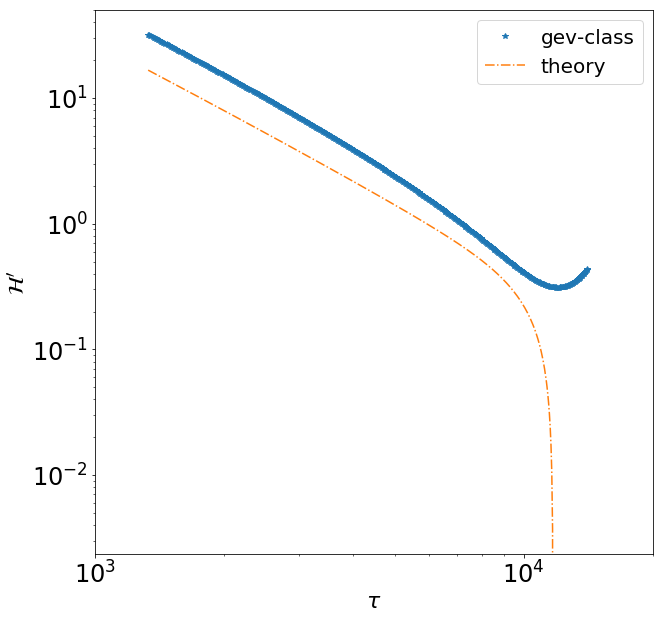

In [332]:
plt.figure(figsize=(10,10))
h=0.67556
H_prime = bg[:,4];
H_p_interp = interp1d(bg[:,0],bg[:,4])
a = 1./(1. + bg[:,0]);

# H'(hiclass column) which is dH/dtau = dH_conf*a/dtau
# H0 = bg[-1:,3];
# plt.plot(bg[:,2],-bg[:,4]/H0/H0,".",label="hiclass1");

# hiclass 
# H_prime=(bg[:,3] - np.roll(bg[:,3],1))*a/(bg[:,2] - np.roll(bg[:,2],1))

# plt.plot(bg[:,2],-H_prime/H0/H0,"-.",label="hiclass");

##### gevolution CLASS interface! Using internal formula!
a_gev = bg_gev[:,2];
H_prime = bg_gev[:,4]*a_gev + bg_gev[:,3]**2
plt.plot(bg_gev[:,1]*400./0.67556, H_prime,"*",label = "gev-class")


##### gevolution hiCLASS interface! Using hiclass!
# plt.plot(bg_gev2[:,1]*400./0.67556, -bg_gev2[:,4],".",label = "gev-hiclass")

#  H' from gevolution column!
tau_gev= bg_gev[:,1]*400./0.67556;
a = bg_gev[:,2];
plt.plot(tau_gev,-Hubble_prime_conf_Mpc(a)/Hubble_conf_Mpc(1.)/Hubble_conf_Mpc(1.),"-.",label="theory")



# compute H' from H definition by Delta H/Delta tau!
# tau_gev= bg_gev[:,1]*400./0.67556;
# a = bg_gev[:,2];
# H_prime_defined = (Hubble_conf_Mpc(a) - Hubble_conf_Mpc(np.roll(a,1)))/(tau_gev - np.roll(tau_gev,1))
# plt.plot(tau_gev,-H_prime_defined/Hubble_conf_Mpc(1.)/Hubble_conf_Mpc(1.),"-.",label="defined")

plt.yscale("log")
plt.xscale("log")
plt.tick_params(labelsize=24)
# plt.ylim(1.e-4,1.e6)
plt.xlim(1*10**3,2*10**4)
plt.ylabel("$\mathcal{H}'$",fontsize=22)
plt.xlabel("$\\tau$",fontsize=22)
plt.legend(fontsize=20)

## $\mathcal{H}(z)$

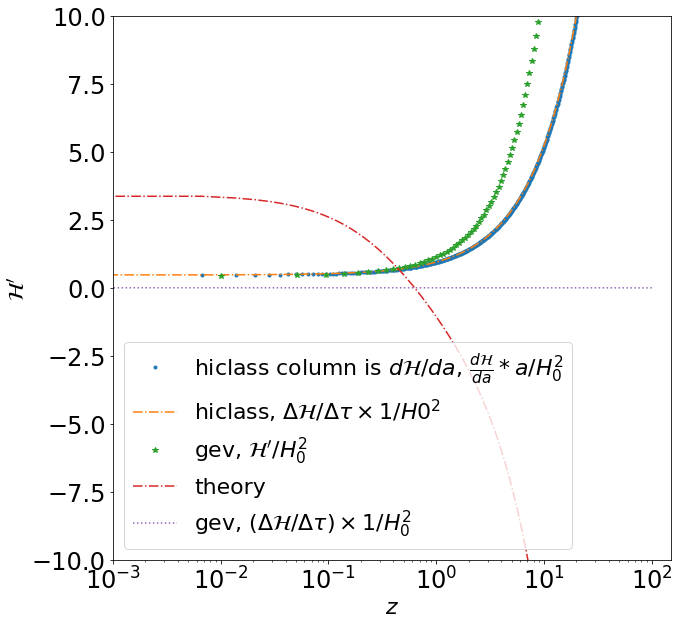

In [103]:
plt.figure(figsize=(10,10))
h=0.67556
H_prime = bg[:,4];
H_p_interp = interp1d(bg[:,0],bg[:,4])
a = 1./(1. + bg[:,0]);

H0 = bg[-1:,3];
plt.plot(bg[:,0],-bg[:,4]*a/H0/H0,".",label=r"hiclass column is $d\mathcal{H}/da$, $\frac{d\mathcal{H}}{da}*a/H_0^2$");

H_prime=(bg[:,3] - np.roll(bg[:,3],1))*a/(bg[:,2] - np.roll(bg[:,2],1))

plt.plot(bg[:,0],-H_prime/H0/H0,"-.",label=r"hiclass, $\Delta\mathcal{H}/\Delta \tau  \times 1/H0^2$");

# gevolution direct H'
z_gev = 1/bg_gev[:,2] -1.;
plt.plot(z_gev, bg_gev[:,4],"*",label = "gev, $\mathcal{H}'/H_0^2$")

# Theory:
plt.plot(bg[:,0],Hubble_prime_conf_Mpc(a)/Hubble_conf_Mpc(1.)/Hubble_conf_Mpc(1.),"-.",label="theory")

# gevolution H' = Delta Hconf/Delta tau
H_prime_gev=(bg_gev[:,3] - np.roll(bg_gev[:,3],1))/((bg_gev[:,1] - np.roll(bg_gev[:,1],1))*400./0.67556)
plt.plot(z_gev, H_prime_gev/bg_gev[-1:,3],":",label = r"gev, $(\Delta\mathcal{H}/\Delta \tau) \times 1/H_0^2$")

# plt.yscale("log")
plt.xscale("log")
plt.tick_params(labelsize=24)
plt.ylim(-10,10)
plt.xlim(0.001,150)
plt.ylabel("$\mathcal{H}'$",fontsize=22)
plt.xlabel("$z$",fontsize=22)
plt.legend(fontsize=22)

## $\mathcal{H}''$ 

Text(0.5,0,'$\\tau$')

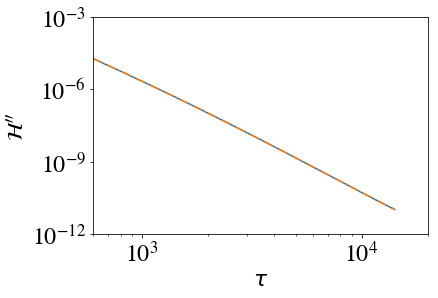

In [212]:
plt.plot(bg[:,2],bg[:,35])
H_prime_prime=(bg[:,4] - np.roll(bg[:,4],1))/(bg[:,2] - np.roll(bg[:,2],1))
plt.plot(bg[:,2],H_prime_prime,"-.")
plt.yscale("log")
plt.xscale("log")
plt.tick_params(labelsize=24)
plt.ylim(10**-12,10**-3)
plt.xlim(6*10**2,2*10**4)
plt.ylabel("$\mathcal{H}''$",fontsize=22)
plt.xlabel("$\\tau$",fontsize=22)

## $p'$ test

Text(0.5,0,'$\\tau$')

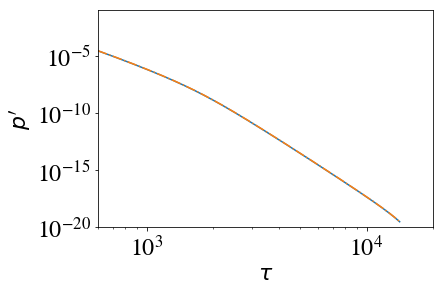

In [213]:
plt.plot(bg[:,2],-bg[:,22])
p_prime=(bg[:,20] -np.roll(bg[:,20],1))/(bg[:,2] - np.roll(bg[:,2],1))
plt.plot(bg[:,2],-p_prime,"-.")
plt.yscale("log")
plt.xscale("log")
plt.tick_params(labelsize=24)
plt.ylim(10**-20,0.1)
plt.xlim(6*10**2,2*10**4)
plt.ylabel("$p'$",fontsize=22)
plt.xlabel("$\\tau$",fontsize=22)

## $\rho'$ test

Text(0.5,0,'$\\tau$')

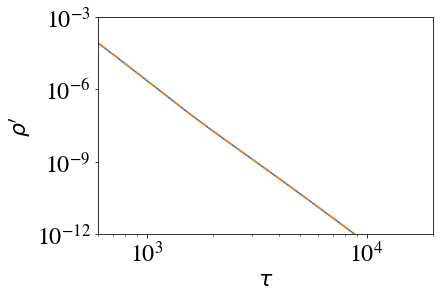

In [214]:
plt.plot(bg[:,2],-bg[:,21])
rho_prime=(bg[:,19]-np.roll(bg[:,19],1))/(bg[:,2] - np.roll(bg[:,2],1))
plt.plot(bg[:,2],-rho_prime,"-.")
plt.yscale("log")
plt.xscale("log")
plt.tick_params(labelsize=24)
plt.ylim(10**-12,10**-3)
plt.xlim(6*10**2,2*10**4)
plt.ylabel("$\\rho'$",fontsize=22)
plt.xlabel("$\\tau$",fontsize=22)

## $(c_s^2)'$

Text(0.5,0,'$\\tau$')

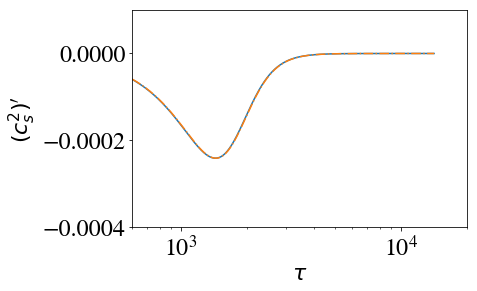

In [215]:
plt.plot(bg[:,2],bg[:,30])
cs2_p=(bg[:,29]-np.roll(bg[:,29],1))/(bg[:,2] - np.roll(bg[:,2],1))
plt.plot(bg[:,2],cs2_p,"-.")
# plt.yscale("log")
plt.xscale("log")
plt.tick_params(labelsize=24)
plt.ylim(-4*10**-4,10**-4)
plt.xlim(6*10**2,2*10**4)
plt.ylabel("$(c_s^2)'$",fontsize=22)
plt.xlabel("$\\tau$",fontsize=22)

## $\phi'$

Text(0.5,0,'$\\tau$')

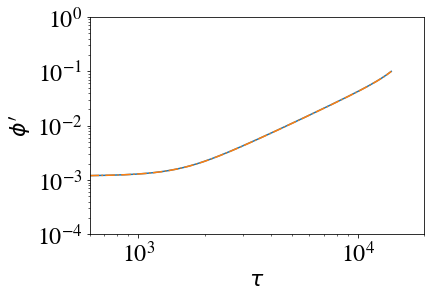

In [216]:
plt.plot(bg[:,2],bg[:,33])
prime=(bg[:,32]-np.roll(bg[:,32],1))/(bg[:,2] - np.roll(bg[:,2],1))
plt.plot(bg[:,2],prime,"-.")
plt.yscale("log")
plt.xscale("log")
plt.tick_params(labelsize=24)
plt.ylim(10**-4,1)
plt.xlim(6*10**2,2*10**4)
plt.ylabel("$\phi'$",fontsize=22)
plt.xlabel("$\\tau$",fontsize=22)

## $\phi''$

Text(0.5,0,'$\\tau$')

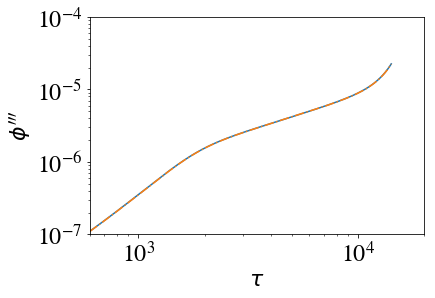

In [217]:
plt.plot(bg[:,2],bg[:,34])
prime=(bg[:,33]-np.roll(bg[:,33],1))/(bg[:,2] - np.roll(bg[:,2],1))
plt.plot(bg[:,2],prime,"-.")
plt.yscale("log")
plt.xscale("log")
plt.tick_params(labelsize=24)
plt.ylim(10**-7,10**-4)
plt.xlim(6*10**2,2*10**4)
plt.ylabel("$\phi'''$",fontsize=22)
plt.xlabel("$\\tau$",fontsize=22)

## $c_s^2(num)'$

Text(0.5,0,'$\\tau$')

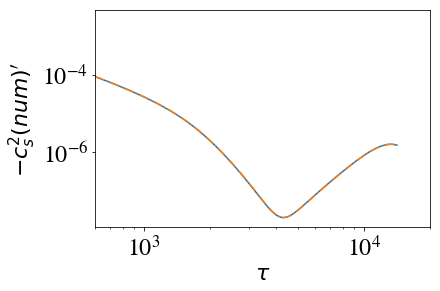

In [218]:
plt.plot(bg[:,2],-bg[:,60])
prime=(bg[:,59]-np.roll(bg[:,59],1))/(bg[:,2] - np.roll(bg[:,2],1))
plt.plot(bg[:,2],-prime,"-.")
plt.yscale("log")
plt.xscale("log")
plt.tick_params(labelsize=24)
# plt.ylim(10**-4,1)
plt.xlim(6*10**2,2*10**4)
plt.ylabel("$-c_s^2(num)'$",fontsize=22)
plt.xlabel("$\\tau$",fontsize=22)